<a href="https://colab.research.google.com/github/sushmitharamk/computervision/blob/main/ImageClassification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image classification using MNIST dataset**

In [ ]:
#import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

torch.manual_seed(0)

In [ ]:
#load data
train_dataset = datasets.MNIST('./data',
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST('./data',
                              train = False,
                              transform = transforms.ToTensor())


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11573485.92it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 347577.70it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3032449.12it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6394940.84it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:

batch_size = 32

train_loader = DataLoader(dataset = train_dataset,
                          batch_size =batch_size,
                          shuffle = True)

test_loader = DataLoader(dataset = test_dataset,
                         batch_size = batch_size,
                         shuffle = False)

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
class MLP(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
print(train_loader)
train_loader.dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
enumerate(train_loader)

In [ ]:
def train():
  model.train()
  running_loss =0
  running_correct =0

  for (x_train,y_train) in train_loader:
    x_train = x_train.view(x_train.shape[0],-1)
    y=model(x_train)

    loss = loss_function(y,y_train)
    running_loss +=loss.item()

    y_pred = y.argmax(dim=1)
    correct = torch.sum(y_pred == y_train)
    running_correct += correct

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  return running_loss/len(train_loader),running_correct.item()/len(train_loader.dataset)



In [ ]:
def val():
  model.eval()
  running_loss=0
  running_correct =0
  with torch.no_grad():
    for (x_val, y_val) in test_loader:
      x_val = x_val.view(x_val.shape[0],-1)
      y = model(x_val)
      prob = nn.functional.softmax(y,dim=1)
      y_pred = prob.argmax(dim = 1)
      correct =  torch.sum(y_pred == y_val)
      running_correct += correct
      loss = loss_function(y,y_val)
    return running_loss/len(test_loader),running_correct.item()/len(test_loader.dataset)


In [ ]:
num_epochs = 20

model = MLP()

loss_function = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr = 1e-2)

In [ ]:
train_loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []

print("Starting Training...")
for ep in range(num_epochs):
  train_loss, train_acc=train()
  val_loss, val_acc =val()
  print("Epoch: {}, Train Loss = {:.3f}, Train Acc = {:.3f} , Val Loss = {:.3f}, Val Acc = {:.3f}".
          format(ep, train_loss, train_acc, val_loss, val_acc))
  train_loss_history.append(train_loss)
  val_loss_history.append(val_loss)
  train_acc_history.append(train_acc)
  val_acc_history.append(val_acc)


Starting Training...
Epoch: 0, Train Loss = 0.352, Train Acc = 0.899 , Val Loss = 0.000, Val Acc = 0.913
Epoch: 1, Train Loss = 0.292, Train Acc = 0.916 , Val Loss = 0.000, Val Acc = 0.927
Epoch: 2, Train Loss = 0.253, Train Acc = 0.927 , Val Loss = 0.000, Val Acc = 0.936
Epoch: 3, Train Loss = 0.222, Train Acc = 0.937 , Val Loss = 0.000, Val Acc = 0.939
Epoch: 4, Train Loss = 0.197, Train Acc = 0.943 , Val Loss = 0.000, Val Acc = 0.946
Epoch: 5, Train Loss = 0.175, Train Acc = 0.950 , Val Loss = 0.000, Val Acc = 0.952
Epoch: 6, Train Loss = 0.157, Train Acc = 0.955 , Val Loss = 0.000, Val Acc = 0.954
Epoch: 7, Train Loss = 0.142, Train Acc = 0.960 , Val Loss = 0.000, Val Acc = 0.959
Epoch: 8, Train Loss = 0.130, Train Acc = 0.963 , Val Loss = 0.000, Val Acc = 0.963
Epoch: 9, Train Loss = 0.118, Train Acc = 0.966 , Val Loss = 0.000, Val Acc = 0.964
Epoch: 10, Train Loss = 0.109, Train Acc = 0.969 , Val Loss = 0.000, Val Acc = 0.966
Epoch: 11, Train Loss = 0.100, Train Acc = 0.971 , Val

Text(0.5, 1.0, 'Accuracy Curve')

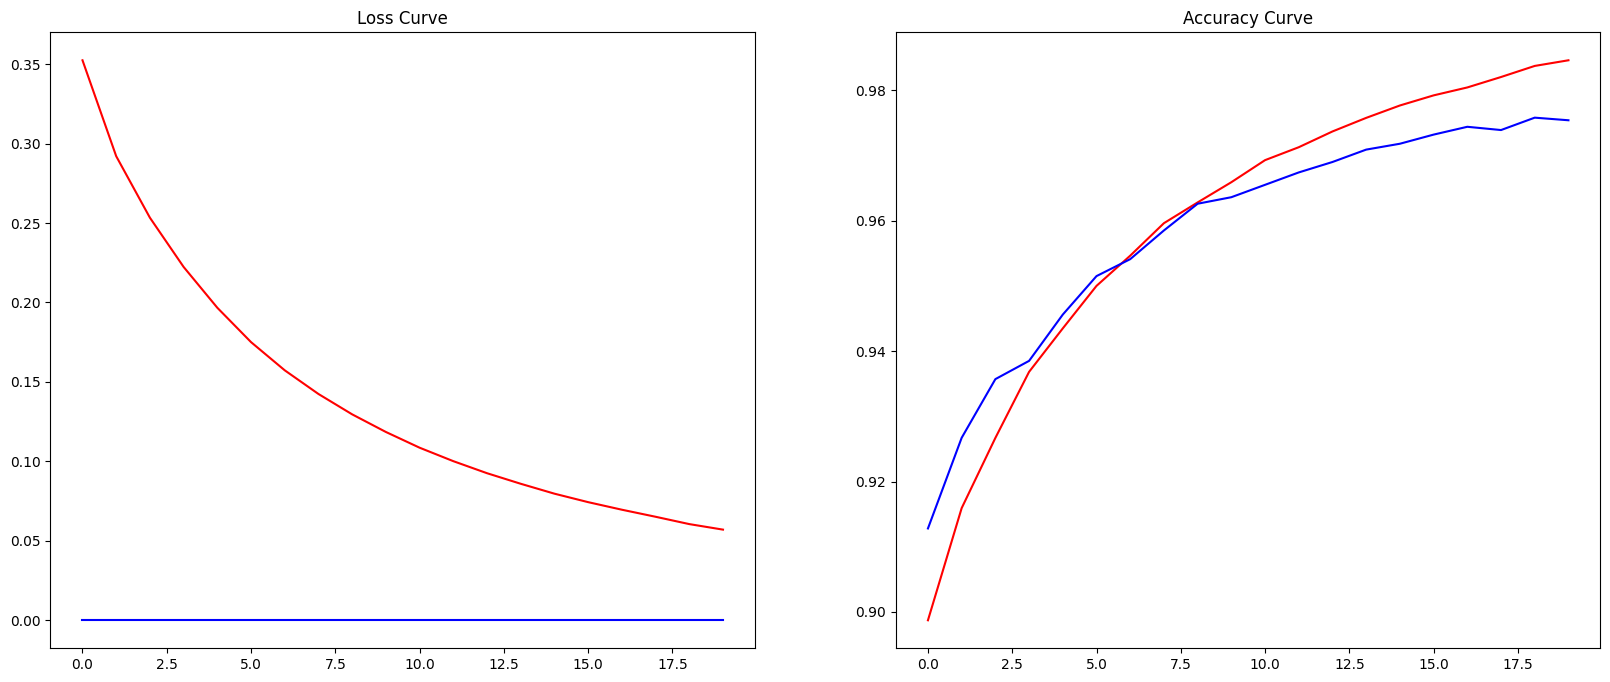

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[20,8])
plt.subplot(121)
plt.plot(train_loss_history,'r')
plt.plot(val_loss_history,'b')
plt.title("Loss Curve")

plt.subplot(122)
plt.plot(train_acc_history,'r')
plt.plot(val_acc_history,'b')
plt.title("Accuracy Curve")

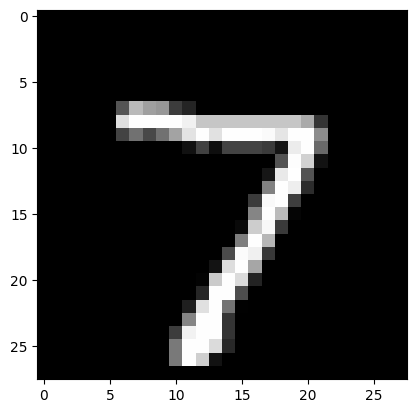

In [ ]:
images, labels = next(iter(test_loader))
plt.imshow(images[0][0],'gray')

In [ ]:
images.resize_(images.shape[0],1,784)
score=model(images[0,:])
prob = nn.functional.softmax(score[0],dim=0)
y_pred = prob.argmax()
print("Predicted class {} with probability {}".format(y_pred, prob[y_pred]))

Predicted class 7 with probability 0.9983810186386108
